In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
churn_df = pd.read_excel("customer_churn_large_dataset.xlsx")

In [3]:
churn_df.head(5)    # to view starting rows

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
churn_df.tail(5)   # to view ending rows

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [5]:
churn_df.sample(10)      # to view random data from the dataset

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
76028,76029,Customer_76029,42,Male,Los Angeles,5,78.60,363,0
24840,24841,Customer_24841,20,Male,Miami,15,31.34,350,1
308,309,Customer_309,22,Male,New York,23,33.01,112,0
19213,19214,Customer_19214,18,Male,New York,20,66.35,138,0
29174,29175,Customer_29175,48,Male,New York,21,35.28,477,0
68097,68098,Customer_68098,32,Male,Chicago,13,40.67,414,1
22218,22219,Customer_22219,54,Male,Los Angeles,14,63.98,429,1
74350,74351,Customer_74351,37,Female,Los Angeles,17,59.55,282,0
69938,69939,Customer_69939,64,Male,Houston,9,59.89,226,1
95699,95700,Customer_95700,48,Male,Chicago,18,76.18,386,1


In [6]:
churn_df.shape          # to view how big your data is

(100000, 9)

In [7]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


# Data Preprocessing

In [8]:
churn_df.isna().sum()     # This is to find null values according to columns

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

### As we can see there is no null values in our dataset

In [9]:
churn_df.duplicated().sum()

0

### As we can see there is no duplicate values in our dataset


# Exploratory Data Analysis

In [10]:
churn_df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

In [12]:
# bar = px.bar(churn_df, x=churn_df["Location"].unique(), y=churn_df["Location"].value_counts(),color=churn_df["Location"].unique())
# bar.update_layout(
#     width=500,  # Width in pixels
#     height=500  # Height in pixels
# )
# bar.show()

location_counts = churn_df["Location"].value_counts()

# Create the bar chart
bar = px.bar(x=location_counts.index, y=location_counts, color=location_counts.index)

bar.update_layout(
    width=500,  # Width in pixels
    height=500  # Height in pixels
)

bar.show()

In [13]:
location_counts = churn_df["Location"].value_counts()

# Create the pie chart
pie = px.pie(names=location_counts.index, values=location_counts, color=location_counts.index)

pie.update_layout(
    width=500,  # Width in pixels
    height=500  # Height in pixels
)

pie.show()

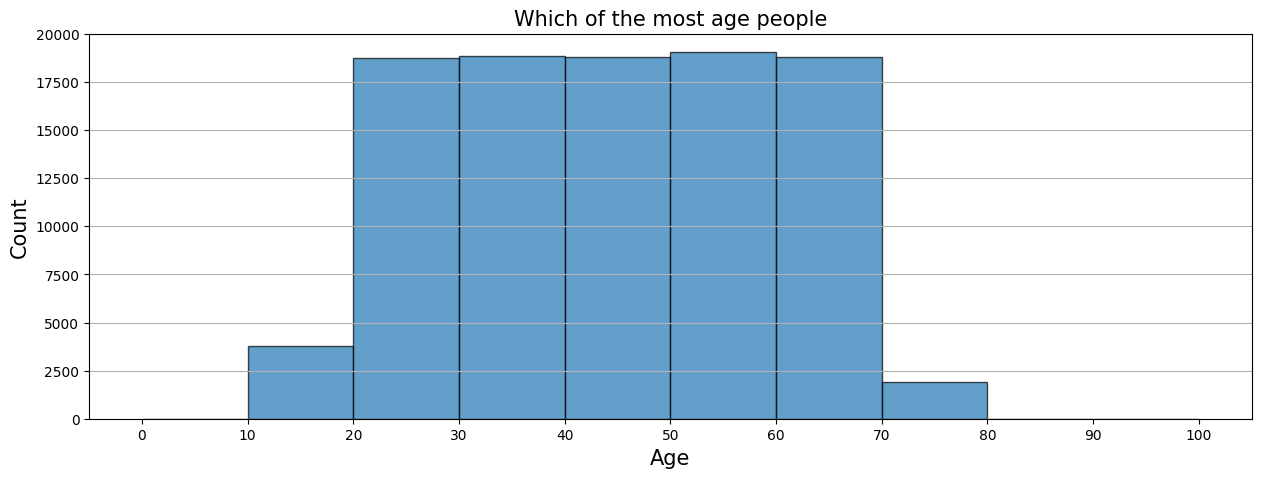

In [14]:
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create a histogram using plt.hist
plt.figure(figsize=(15, 5))
plt.hist(churn_df['Age'], bins=bin_edges, edgecolor='k', alpha=0.7)

# Customize the plot
plt.title("Which of the most age people", fontsize=15)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.grid(axis="y")

# Add labels to the x-axis based on the bin edges
plt.xticks(bin_edges)

plt.show()

Text(0, 0.5, 'Count')

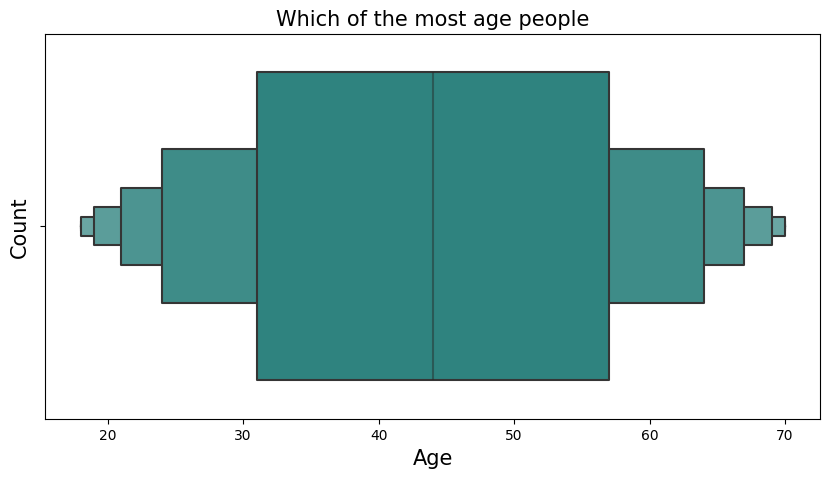

In [15]:
plt.figure(figsize=(10,5))
sns.boxenplot(x="Age",data=churn_df,palette = "viridis")
plt.title("Which of the most age people",fontsize=15)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Count",fontsize=15)

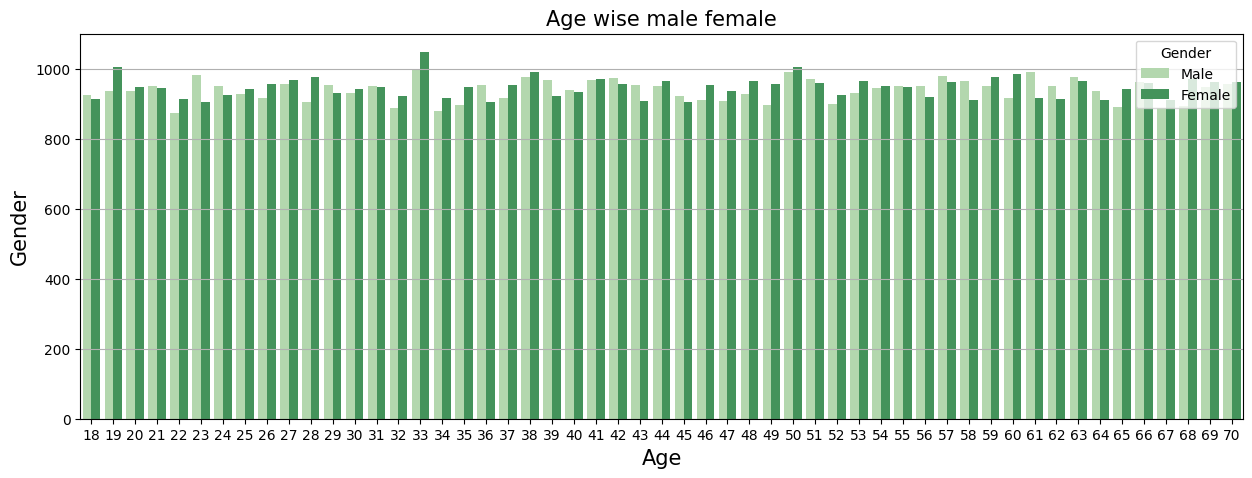

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x="Age",hue="Gender",data=churn_df,palette="Greens")
plt.title("Age wise male female",fontsize=15)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Gender",fontsize=15)
plt.grid(axis="y")
plt.show()

<Axes: ylabel='count'>

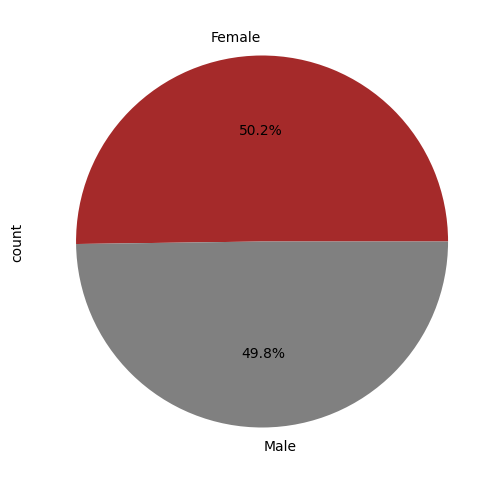

In [17]:
#piechart
plt.figure(figsize=(6,8))
colors = [ 'brown',  'grey']
churn_df["Gender"].value_counts().plot.pie(autopct="%.1f%%",colors=colors)

Observation:

       * 50.2% are female.
       * 49.1% are male.

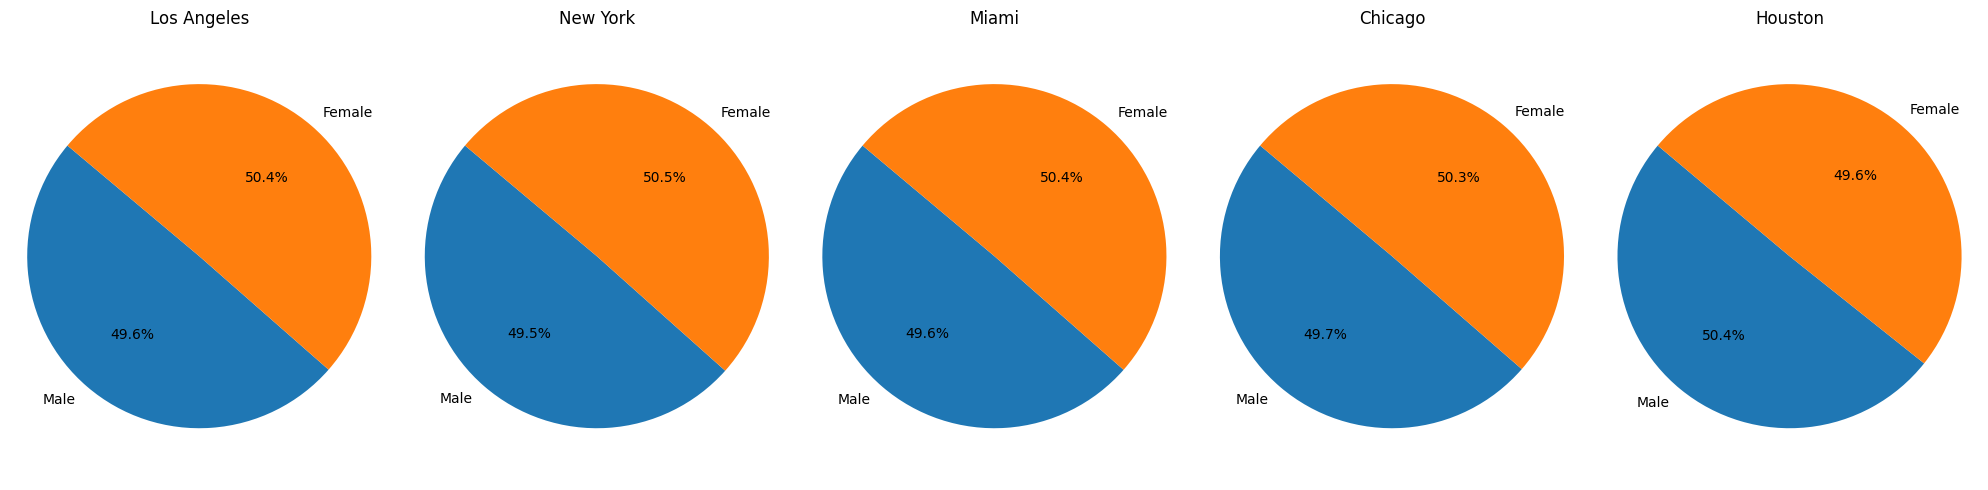

In [18]:
locations_to_count = churn_df['Location'].unique()

# Create an empty dictionary to store counts
location_counts = {}

# Iterate through the locations and count males and females
for location in locations_to_count:
    location_df = churn_df[churn_df['Location'] == location]
    male_count = (location_df['Gender'] == 'Male').sum()
    female_count = (location_df['Gender'] == 'Female').sum()
    location_counts[location] = {'Male': male_count, 'Female': female_count}

fig, axs = plt.subplots(1, 5, figsize=(20, 5))
i=0
# Display the counts for each location
for location, counts in location_counts.items():
    labels = ['Male', 'Female']
    data = [counts['Male'], counts['Female']]
    axs[i].pie([counts['Male'],counts['Female']], labels=labels, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(location)
    axs[i].axis('equal') 
    i+=1
    
plt.tight_layout()

# Show the subplots
plt.show()

### Here we can see that male and females customers are same in all of the locations are approximately same

# Churn according to cities and gender

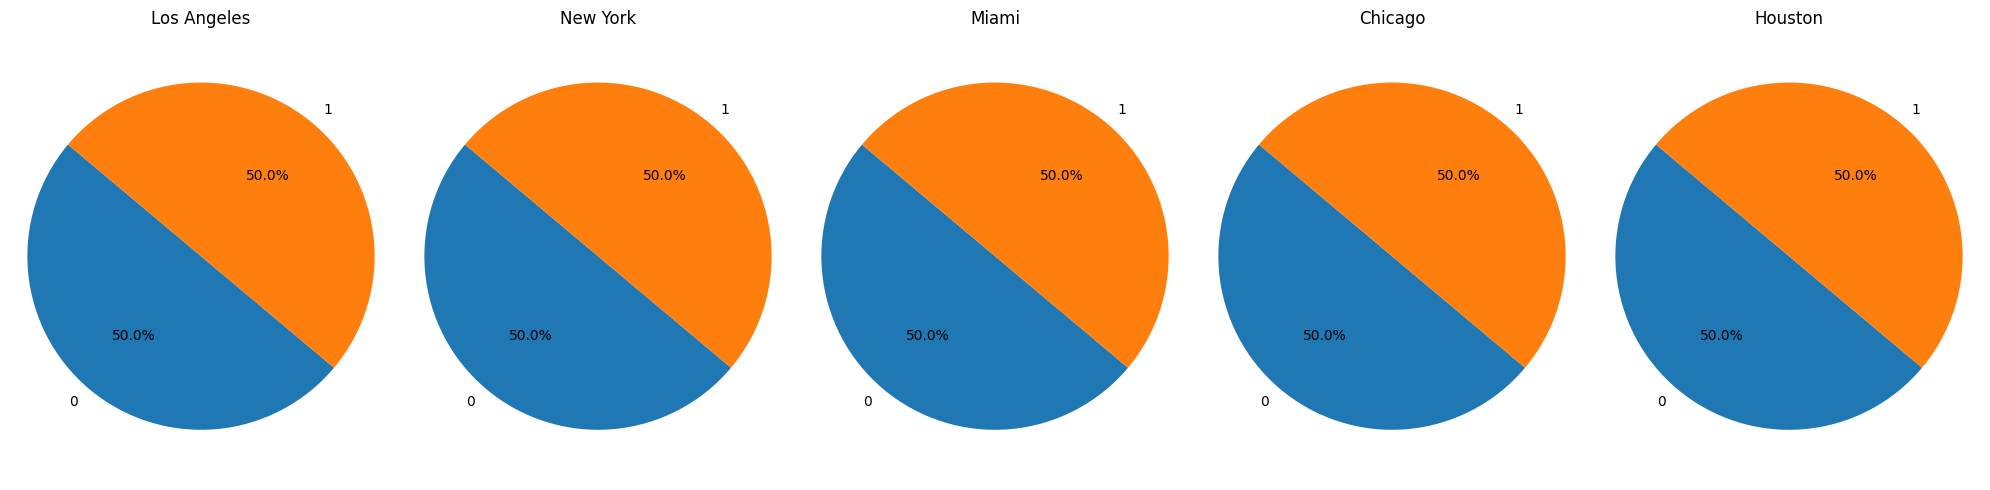

In [19]:
locations_to_count = churn_df['Location'].unique()


location_counts = {}

for location in locations_to_count:
    location_df = churn_df[churn_df['Location'] == location]
    churn_0_count = (location_df['Churn'] == '0').count()
    churn_1_count = (location_df['Churn'] == '1').count()
    location_counts[location] = {'0': churn_0_count, '1': churn_1_count}


fig, axs = plt.subplots(1, 5, figsize=(20, 5))
i=0

for location, counts in location_counts.items():
    labels = ['0', '1']
    data = [counts['0'], counts['1']]
    axs[i].pie([counts['0'],counts['1']], labels=labels, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(location)
    axs[i].axis('equal') 
    i+=1
    
plt.tight_layout()


plt.show()

## Customer count according to Subscription Lenght according to Gender

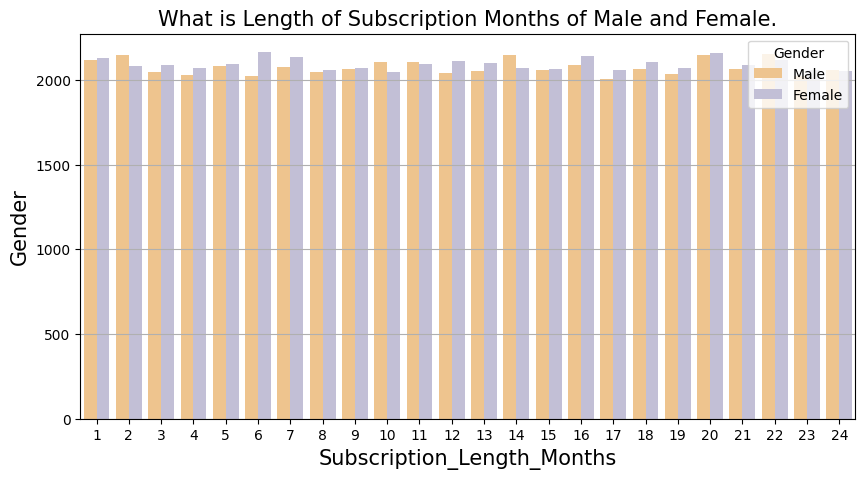

In [20]:
#countplot
plt.figure(figsize=(10,5))
sns.countplot(x="Subscription_Length_Months",hue="Gender",data=churn_df,palette="PuOr")
plt.title("What is Length of Subscription Months of Male and Female.",fontsize=15)
plt.xlabel("Subscription_Length_Months",fontsize=15)
plt.ylabel("Gender",fontsize=15)
plt.grid(axis="y")
plt.show()

In [21]:
Monthly_Bill_male_female = churn_df.groupby(['Gender'])['Monthly_Bill'].sum().sort_values(ascending=False).reset_index()
Monthly_Bill_male_female

,Gender,Monthly_Bill
0,Female,3264446.57
1,Male,3240873.11


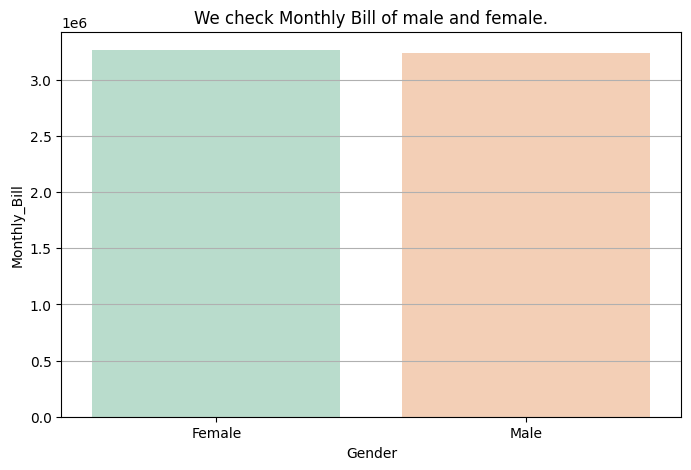

In [22]:
#barplot
plt.figure(figsize=(8,5))
sns.barplot(x='Gender',y='Monthly_Bill',data=Monthly_Bill_male_female,palette='Pastel2')
plt.title('We check Monthly Bill of male and female.')
plt.xlabel('Gender',fontsize=10)
plt.ylabel('Monthly_Bill',fontsize=10)
plt.grid(axis='y')

## Total bill according to male and female

# *** Finding outliers ***


## For Numerical values

<Axes: xlabel='Age'>

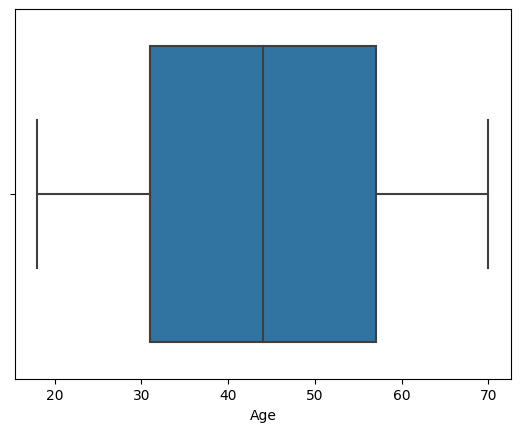

In [23]:
sns.boxplot(x="Age",data=churn_df)

<Axes: xlabel='Total_Usage_GB'>

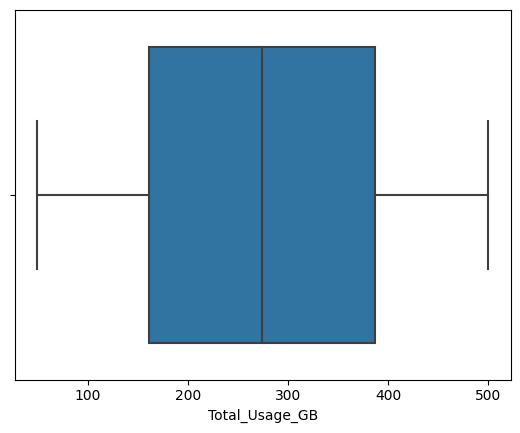

In [24]:
sns.boxplot(x="Total_Usage_GB",data=churn_df)

<Axes: xlabel='Subscription_Length_Months'>

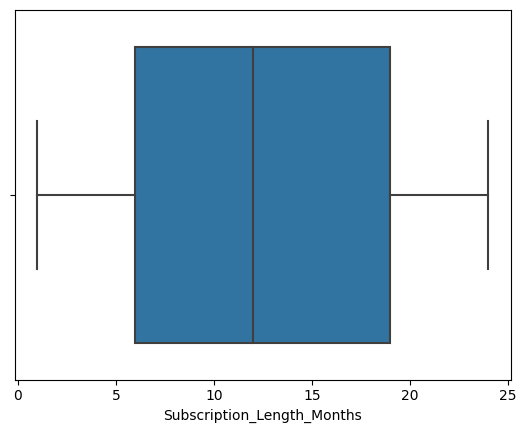

In [25]:
sns.boxplot(x="Subscription_Length_Months",data=churn_df)

  ##  By Gender

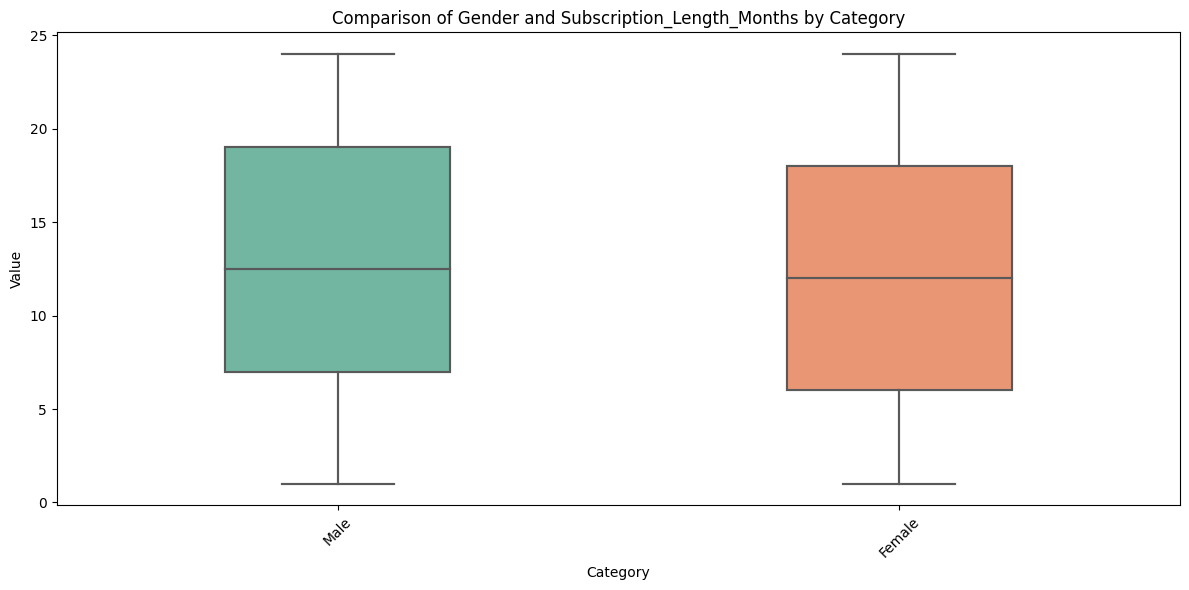

In [26]:
plt.figure(figsize=(12, 6))

# Create a boxplot comparing Column1 and Column2 by Category
sns.boxplot(x='Gender', y='Subscription_Length_Months', data=churn_df, width=0.4, palette='Set1')
sns.boxplot(x='Gender', y='Subscription_Length_Months', data=churn_df, width=0.4, palette='Set2')

plt.title('Comparison of Gender and Subscription_Length_Months by Category')
plt.xlabel('Category')
plt.ylabel('Value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

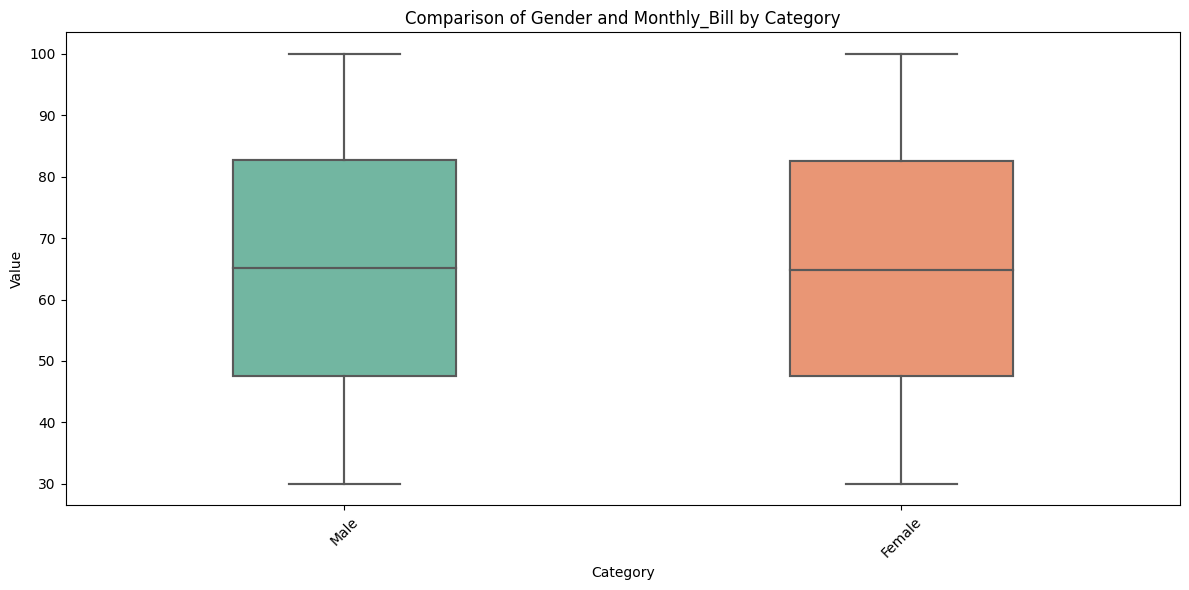

In [27]:
plt.figure(figsize=(12, 6))

# Create a boxplot comparing Column1 and Column2 by Category
sns.boxplot(x='Gender', y='Monthly_Bill', data=churn_df, width=0.4, palette='Set1')
sns.boxplot(x='Gender', y='Monthly_Bill', data=churn_df, width=0.4, palette='Set2')

plt.title('Comparison of Gender and Monthly_Bill by Category')
plt.xlabel('Category')
plt.ylabel('Value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

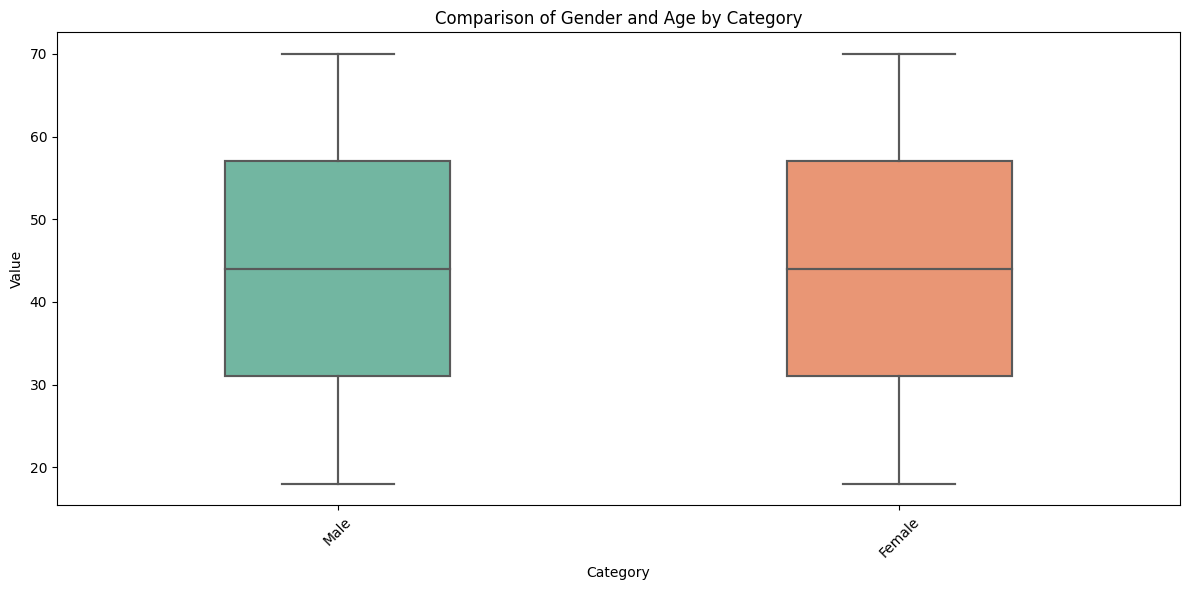

In [28]:
plt.figure(figsize=(12, 6))

# Create a boxplot comparing Column1 and Column2 by Category
sns.boxplot(x='Gender', y='Age', data=churn_df, width=0.4, palette='Set1')
sns.boxplot(x='Gender', y='Age', data=churn_df, width=0.4, palette='Set2')

plt.title('Comparison of Gender and Age by Category')
plt.xlabel('Category')
plt.ylabel('Value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### there are no outlier with the categorical data gender with subscription months,age and bill

  ## By Location

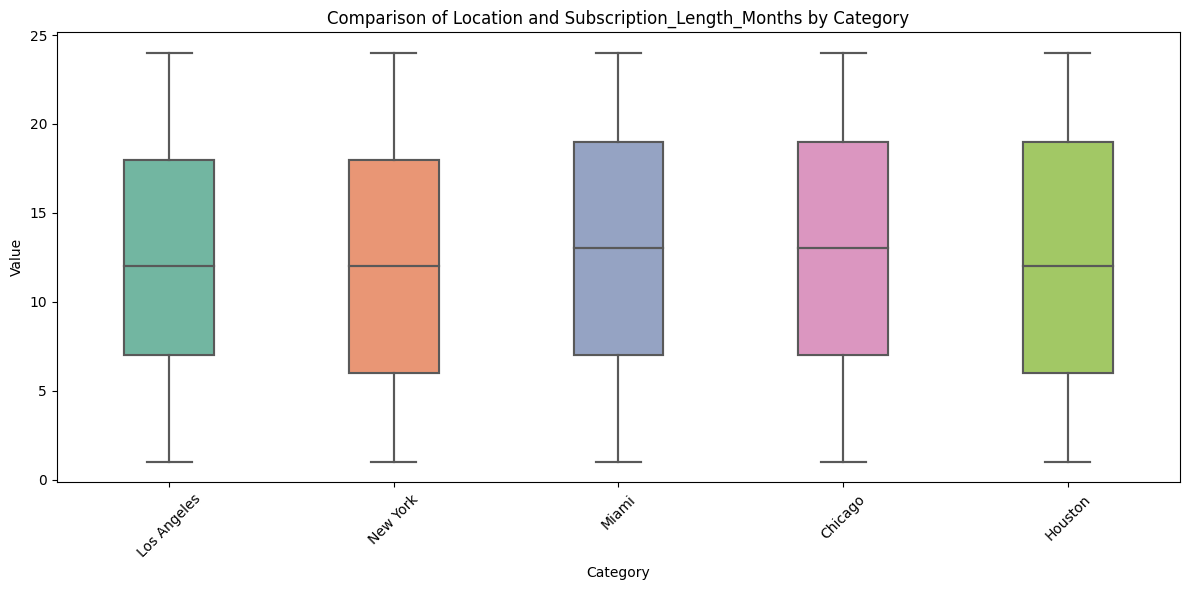

In [29]:
plt.figure(figsize=(12, 6))

# Create a boxplot comparing Column1 and Column2 by Category
sns.boxplot(x='Location', y='Subscription_Length_Months', data=churn_df, width=0.4, palette='Set1')
sns.boxplot(x='Location', y='Subscription_Length_Months', data=churn_df, width=0.4, palette='Set2')

plt.title('Comparison of Location and Subscription_Length_Months by Category')
plt.xlabel('Category')
plt.ylabel('Value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

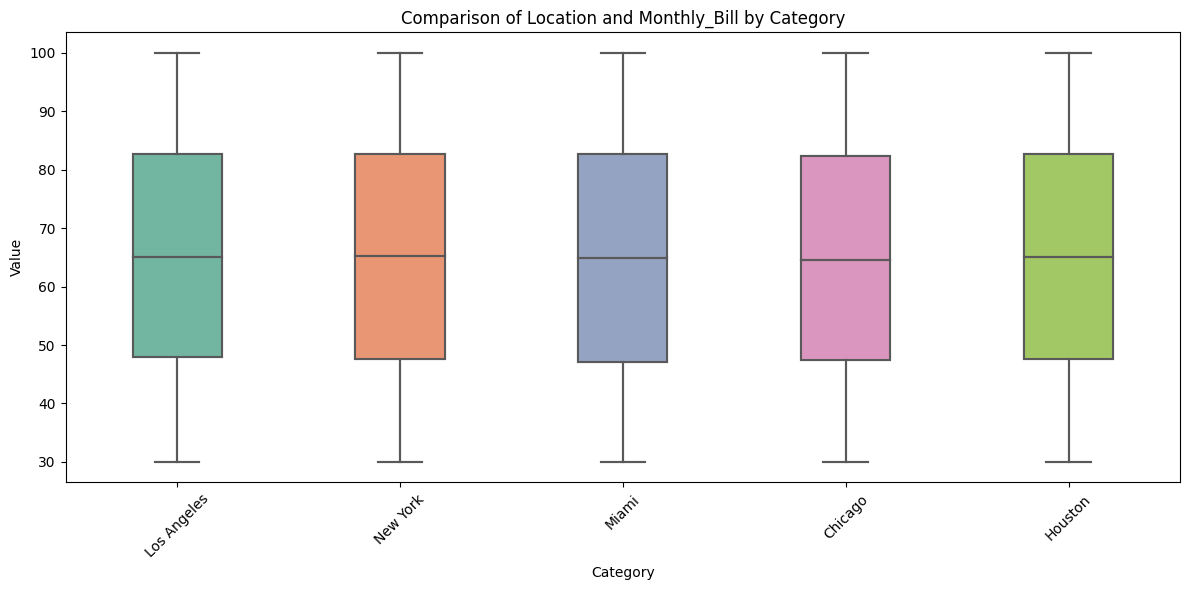

In [30]:
plt.figure(figsize=(12, 6))

# Create a boxplot comparing Column1 and Column2 by Category
sns.boxplot(x='Location', y='Monthly_Bill', data=churn_df, width=0.4, palette='Set1')
sns.boxplot(x='Location', y='Monthly_Bill', data=churn_df, width=0.4, palette='Set2')

plt.title('Comparison of Location and Monthly_Bill by Category')
plt.xlabel('Category')
plt.ylabel('Value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

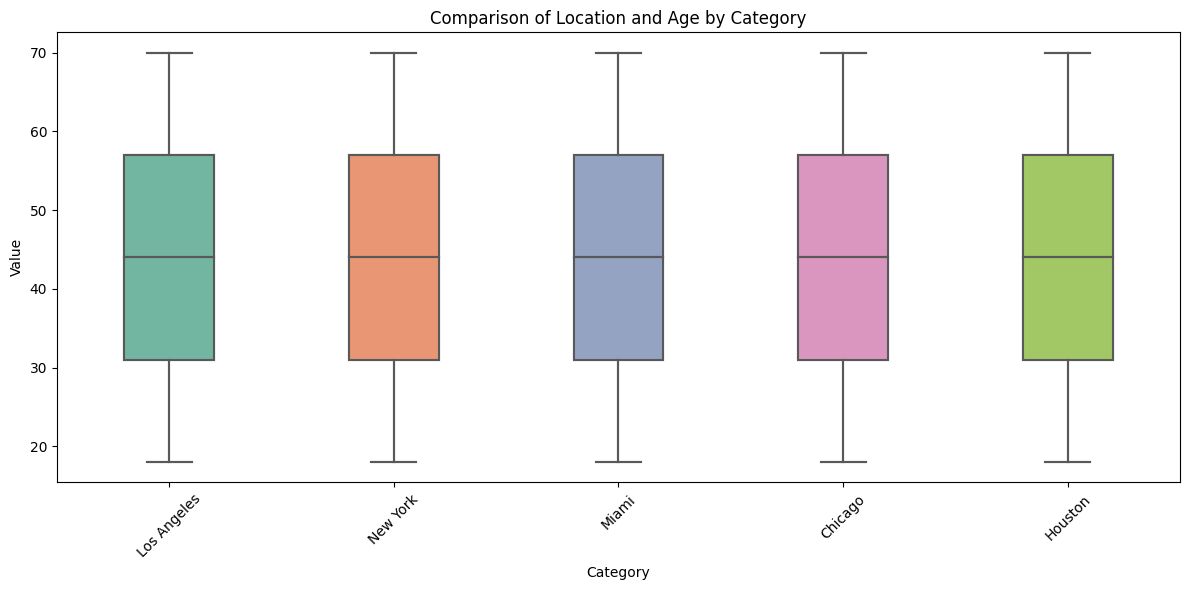

In [31]:
plt.figure(figsize=(12, 6))

# Create a boxplot comparing Column1 and Column2 by Category
sns.boxplot(x='Location', y='Age', data=churn_df, width=0.4, palette='Set1')
sns.boxplot(x='Location', y='Age', data=churn_df, width=0.4, palette='Set2')

plt.title('Comparison of Location and Age by Category')
plt.xlabel('Category')
plt.ylabel('Value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## By locations also there are no outlier with any numerical value

# Finding the correlation of data

In [32]:
num_df = churn_df.select_dtypes(include='number')

In [33]:
num_df.corr()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


<Axes: >

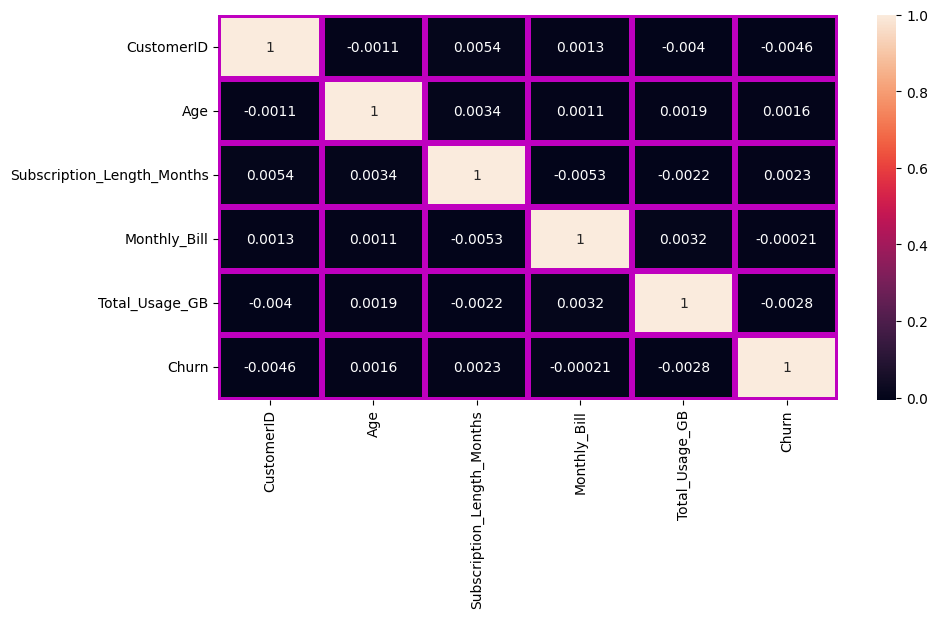

In [34]:
#hitmap
num_df = churn_df.select_dtypes(include='number')
num_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(num_df.corr(),annot=True,linewidths=4,linecolor="m")

In [35]:
churn_df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


# Feature engineering


In [36]:
X = churn_df.drop(columns=["Churn","CustomerID","Name"])
y = churn_df["Churn"]

In [37]:


X['Gender'] = X['Gender'].map({"Male":0,"Female":1})
X['Location'] = X['Location'].map({'Los Angeles': 0, 'New York': 1, 'Miami': 2, 'Chicago': 3, 'Houston': 4})

In [38]:
X.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,0,0,17,73.36,236
1,62,1,1,1,48.76,172
2,24,1,0,5,85.47,460
3,36,1,2,3,97.94,297
4,46,1,2,19,58.14,266


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [40]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split


In [41]:
# implement Statndard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit PCA
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

In [42]:
X_scaled

array([[ 1.24167039, -1.00432937, -1.41489431,  0.65111499,  0.41060598,
        -0.29428898],
       [ 1.17622625,  0.99568929, -0.70877818, -1.65887854, -0.80537409,
        -0.78485174],
       [-1.31065114,  0.99568929, -1.41489431, -1.08138015,  1.0092043 ,
         1.42268068],
       ...,
       [ 1.30711454, -1.00432937,  0.70345407,  0.65111499,  1.5351404 ,
        -0.17931334],
       [ 0.45634069,  0.99568929, -0.70877818,  1.08423877, -0.78115335,
         1.22338955],
       [-1.11431871,  0.99568929, -1.41489431,  0.93986418,  0.56927655,
        -0.7771867 ]])

In [43]:
X_pca

array([[-0.18748192,  0.40705924,  0.01359517,  1.74817573,  0.30707232,
         1.3711526 ],
       [ 0.43859453, -0.32963835, -0.41859417, -1.24089758,  1.50864014,
         1.61297861],
       [ 2.84836591,  0.19680154, -0.62276623, -0.1407507 , -0.49405663,
        -0.34549448],
       ...,
       [-1.02830925,  1.71369254,  0.23453552,  1.1988216 ,  0.65718395,
        -0.32649751],
       [-0.03022148, -0.68905907, -1.95252227,  0.4299343 , -0.66824171,
         0.25498499],
       [ 1.20128948, -1.54022894, -0.01915411,  1.26607585,  0.5145191 ,
        -0.60251346]])

In [44]:
y = y.astype('int64')

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [46]:
X_train_pca, X_temp_pca, y_train_pca, y_temp_pca = train_test_split(X,y, test_size=0.3, random_state=42)


In [47]:
X_val, X_test_pca, y_val, y_test_pca  = train_test_split(X_temp_pca,y_temp_pca,test_size=0.2,random_state=42)

In [48]:
X_train_pca

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
76513,25,0,0,13,98.13,468
60406,54,1,4,2,71.90,383
27322,32,0,3,20,65.65,427
53699,61,1,4,12,83.20,64
65412,70,1,1,5,41.93,99
...,...,...,...,...,...,...
6265,35,0,2,21,67.33,235
54886,56,0,3,13,85.40,347
76820,69,0,4,2,76.24,321
860,55,0,3,12,89.19,315


In [49]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train_pca = pca.fit_transform(X_train_pca.astype('float32'))
X_test_pca =  pca.fit_transform(X_test_pca.astype('float32'))



# Naive Byes

In [50]:
from sklearn.naive_bayes import GaussianNB

# Create and train the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)


GaussianNB()

In [51]:
nb_classifier.score(X_test,y_test)

0.5034

In [52]:
from sklearn.naive_bayes import GaussianNB

# Create and train the Gaussian Naive Bayes classifier
nb_classifier2 = GaussianNB()
nb_classifier2.fit(X_train_pca, y_train_pca)

GaussianNB()

In [53]:
nb_classifier2.score(X_test_pca,y_test_pca)

0.5043333333333333

In [54]:
nb_classifier2.score(X_train_pca,y_train_pca)

0.5047714285714285

In [55]:
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [56]:
print(report)

              precision    recall  f1-score   support

           0       0.51      0.65      0.57     10079
           1       0.50      0.36      0.42      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000



In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# Define the cross-validation method (e.g., 5-fold)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get performance scores
scores = cross_val_score(nb_classifier2, X_train_pca, y_train_pca, cv=kfold, scoring='accuracy')

# Print the average performance score
print("Average Accuracy:", scores.mean())


Average Accuracy: 0.4992142857142857


In [58]:
scores

array([0.50007143, 0.49821429, 0.49857143, 0.505     , 0.49421429])

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_pca,y_train_pca)
knn.predict(X_test_pca[:10])
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get performance scores
scores = cross_val_score(knn, X_test_pca, y_test_pca, cv=kfold, scoring='accuracy')

# Print the average performance score
print("Average Accuracy:", scores.mean())
print(scores)
knn.score(X_test_pca,y_test_pca)

Average Accuracy: 0.5
[0.4875     0.49916667 0.52416667 0.49416667 0.495     ]


0.5028333333333334

In [61]:
from sklearn.linear_model import LogisticRegression


In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Random Forest

In [63]:
forest = RandomForestClassifier(n_estimators=30, criterion='gini', max_depth=15,min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False,class_weight=None)

In [64]:
forest.fit(X_train_pca, y_train_pca)

RandomForestClassifier(max_depth=15, max_features='auto', n_estimators=30,
                       n_jobs=1)

In [65]:
forest.predict(X_val[:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [66]:
forest.score(X_test_pca,y_test_pca)

0.4886666666666667

In [67]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get performance scores
scores = cross_val_score(forest, X_test_pca, y_test_pca, cv=kfold, scoring='accuracy')

# Print the average performance score
print("Average Accuracy:", scores.mean())
print(scores)

Average Accuracy: 0.5081666666666667
[0.5325     0.49833333 0.5175     0.48166667 0.51083333]


In [68]:
forest.score(X_train_pca,y_train_pca)

0.7411142857142857

In [69]:
y_val[:10]

30092    0
66269    0
88117    1
34170    0
75794    0
69613    0
89585    0
69881    1
9115     0
46239    1
Name: Churn, dtype: int64

# Logistic Regression

In [70]:
reg = LogisticRegression()

In [71]:
reg.fit(X_train_pca,y_train_pca)

LogisticRegression()

In [72]:
reg.predict(X_val)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [73]:
reg.score(X_val,y_val)

0.497

In [74]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get performance scores
scores = cross_val_score(reg, X_test_pca, y_test_pca, cv=kfold, scoring='accuracy')

# Print the average performance score
print("Average Accuracy:", scores.mean())
print(scores)

Average Accuracy: 0.5066666666666666
[0.51333333 0.5075     0.51833333 0.48083333 0.51333333]


In [75]:
reg.predict(X_val[:10])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [76]:
print(y_val[:10])

30092    0
66269    0
88117    1
34170    0
75794    0
69613    0
89585    0
69881    1
9115     0
46239    1
Name: Churn, dtype: int64


In [77]:
forest.predict(X_val[:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# K Neighbour

In [78]:
knn = KNeighborsClassifier()

In [79]:
knn.fit(X_train_pca,y_train_pca)

KNeighborsClassifier()

In [80]:
knn.predict(X_test_pca)

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [81]:
y_test_pca[:10]

81410    0
71182    0
44102    1
69451    0
78508    0
89377    1
44024    1
45402    1
80816    1
38436    0
Name: Churn, dtype: int64

In [82]:
knn.predict(X_test_pca[:10])

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [83]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get performance scores
scores = cross_val_score(knn, X_test_pca, y_test_pca, cv=kfold, scoring='accuracy')

# Print the average performance score
print("Average Accuracy:", scores.mean())
print(scores)

Average Accuracy: 0.5
[0.4875     0.49916667 0.52416667 0.49416667 0.495     ]


In [84]:
knn.score(X_test_pca,y_test_pca)

0.5028333333333334

# Ensemble Model with voting classifier

In [85]:
from sklearn.ensemble import VotingClassifier

In [86]:
ensemble_classifier = VotingClassifier(
    estimators=[
        ('logistic', reg),
        ('random_forest', forest),
        ('naive_bayes', nb_classifier2)
    ],
    voting='soft'  # You can use 'hard' for majority vote or 'soft' for weighted voting
)

In [87]:
ensemble_classifier.fit(X_train_pca,y_train_pca)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('random_forest',
                              RandomForestClassifier(max_depth=15,
                                                     max_features='auto',
                                                     n_estimators=30,
                                                     n_jobs=1)),
                             ('naive_bayes', GaussianNB())],
                 voting='soft')

In [88]:
ensemble_classifier.predict(X_test_pca)

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [89]:
ensemble_classifier.score(X_test_pca,y_test_pca)

0.5001666666666666

In [90]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get performance scores
scores = cross_val_score(ensemble_classifier, X_test_pca, y_test_pca, cv=kfold, scoring='accuracy')

# Print the average performance score
print("Average Accuracy:", scores.mean())
print(scores)

Average Accuracy: 0.5058333333333334
[0.52333333 0.505      0.51       0.50083333 0.49      ]


1
# With neural Network

In [91]:
import tensorflow as tf
from tensorflow import keras

In [109]:
import tensorflow as tf
from tensorflow import keras

# Define the ANN model architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(6,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pca, y_train_pca, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
accuracy = model.evaluate(X_test_pca, y_test_pca)[1]
print(f'Accuracy on the test set: {accuracy}')


Epoch 1/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.7380 - accuracy: 0.5016 - val_loss: 0.7088 - val_accuracy: 0.5044
Epoch 2/10
1750/1750 [==============================] - 4s 3ms/step - loss: 0.7084 - accuracy: 0.5010 - val_loss: 0.7006 - val_accuracy: 0.5068
Epoch 3/10
1750/1750 [==============================] - 4s 3ms/step - loss: 0.7019 - accuracy: 0.5014 - val_loss: 0.7009 - val_accuracy: 0.5000
Epoch 4/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.6981 - accuracy: 0.5061 - val_loss: 0.7016 - val_accuracy: 0.4919
Epoch 5/10
1750/1750 [==============================] - 4s 2ms/step - loss: 0.6944 - accuracy: 0.5004 - val_loss: 0.6933 - val_accuracy: 0.4966
Epoch 6/10
1750/1750 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.5027 - val_loss: 0.6935 - val_accuracy: 0.5020
Epoch 7/10
1750/1750 [==============================] - 4s 3ms/step - loss: 0.6930 - accuracy: 0.5031 - val_loss: 0.6933 - val_accuracy:

In [93]:
model.evaluate(X_train_pca, y_train_pca)[1]

2188/2188 [==============================] - 5s 2ms/step - loss: 0.6932 - accuracy: 0.5027


0.5027285814285278

In [94]:
ann_pred = model.predict(X_train_pca)

ann_res = (ann_pred > 0.5).astype(int)
ann_res=ann_res.reshape(-1)
print(list(ann_res))

2188/2188 [==============================] - 4s 2ms/step
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [95]:
input_dic = {
    'GNB' : (nb_classifier2.predict(X_train_pca)),
    'RandFor' : (forest.predict(X_train_pca)),
    "knn"  : (knn.predict(X_train_pca)),
    "ensemble": (ensemble_classifier.predict(X_train_pca)),

    "output"  : y_train_pca
}

In [96]:
input_dic

{'GNB': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'RandFor': array([1, 1, 1, ..., 1, 1, 0], dtype=int64),
 'knn': array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 'ensemble': array([0, 1, 0, ..., 1, 0, 0], dtype=int64),
 'output': 76513    1
 60406    1
 27322    1
 53699    1
 65412    0
         ..
 6265     0
 54886    0
 76820    1
 860      1
 15795    0
 Name: Churn, Length: 70000, dtype: int64}

In [97]:
mod_df=pd.DataFrame(input_dic)

In [98]:
mod_df.head(20)

,GNB,RandFor,knn,ensemble,output
76513,0,1,0,0,1
60406,0,1,1,1,1
27322,0,1,0,0,1
53699,0,0,1,0,1
65412,1,0,0,0,0
14297,1,1,1,1,1
15664,1,0,1,0,0
49235,0,1,1,0,1
99277,0,1,1,0,1
13809,0,0,1,1,1


In [99]:
mod_df.head()

,GNB,RandFor,knn,ensemble,output
76513,0,1,0,0,1
60406,0,1,1,1,1
27322,0,1,0,0,1
53699,0,0,1,0,1
65412,1,0,0,0,0


In [100]:
Xmod_train, Xmod_test, Ymod_train, Ymod_test = train_test_split(mod_df.drop(columns=['output']),mod_df['output'],test_size=0.2)

In [101]:
Xmod_train

,GNB,RandFor,knn,ensemble
86509,0,1,0,1
71128,0,1,0,1
75829,1,0,0,0
17211,0,0,1,0
66925,1,1,0,1
...,...,...,...,...
65061,0,0,0,0
58255,1,1,1,1
94588,1,1,1,1
80168,1,0,0,1


In [102]:
mod_log = LogisticRegression()

In [103]:
mod_log.fit(Xmod_train,Ymod_train)

LogisticRegression()

In [104]:
mod_log.predict(Xmod_test)

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [105]:
mod_log.score(Xmod_test,Ymod_test)

0.7940714285714285

# using Neural Network

In [106]:
model2 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model2.fit(Xmod_train,Ymod_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
accuracy = model2.evaluate(Xmod_test,Ymod_test)[1]
print(f'Accuracy on the test set: {accuracy}')

Epoch 1/10
1400/1400 [==============================] - 4s 2ms/step - loss: 0.4840 - accuracy: 0.7798 - val_loss: 0.4693 - val_accuracy: 0.7903
Epoch 2/10
1400/1400 [==============================] - 4s 3ms/step - loss: 0.4736 - accuracy: 0.7867 - val_loss: 0.4697 - val_accuracy: 0.7903
Epoch 3/10
1400/1400 [==============================] - 4s 3ms/step - loss: 0.4732 - accuracy: 0.7864 - val_loss: 0.4722 - val_accuracy: 0.7903
Epoch 4/10
1400/1400 [==============================] - 4s 3ms/step - loss: 0.4729 - accuracy: 0.7867 - val_loss: 0.4706 - val_accuracy: 0.7903
Epoch 5/10
1400/1400 [==============================] - 4s 3ms/step - loss: 0.4731 - accuracy: 0.7867 - val_loss: 0.4692 - val_accuracy: 0.7903
Epoch 6/10
1400/1400 [==============================] - 4s 3ms/step - loss: 0.4728 - accuracy: 0.7863 - val_loss: 0.4693 - val_accuracy: 0.7903
Epoch 7/10
1400/1400 [==============================] - 4s 3ms/step - loss: 0.4731 - accuracy: 0.7865 - val_loss: 0.4692 - val_accuracy:

# Testing Our Application

# Enter Customer Details to check Churn Here

# You can give output by below data Run below cell and test my model accordingly

## You Can also Run this customer prediction on streamlit 

In [107]:
churn_df.sample(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
95703,95704,Customer_95704,67,Male,New York,5,40.22,64,1
31098,31099,Customer_31099,19,Male,Chicago,8,83.98,122,0
21751,21752,Customer_21752,57,Male,New York,20,50.68,89,1
90367,90368,Customer_90368,29,Male,Los Angeles,6,79.10,243,0
25759,25760,Customer_25760,64,Female,Miami,8,76.35,343,0


In [108]:
#testing
name = input("Enter Your Name :- ")
print(f"Welcome {name} Lets Check Our Customer Will Leave or not . Please enter following inputs")
Age = int(input("Enter Age :- "))
Gender = (input("Enter M or F :- "))
loc = int(input("Enter number for specific location {'Los Angeles': 0, 'New York': 1, 'Miami': 2, 'Chicago': 3, 'Houston': 4}"))
Subscription = int(input("Enter Duration Months :- "))
bill =float(input("Enter Monthly bill :- "))
gb = float(input("Enter Total Usage :- "))


dic={'Age': [Age],
 'Gender': ['Male' if Gender in ["m",'M'] else "Female"],
 'Location': [list({'Los Angeles': 0, 'New York': 1, 'Miami': 2, 'Chicago': 3, 'Houston': 4}.keys())[loc]],
 'Subscription_Length_Months': [Subscription],
 'Monthly_Bill': [bill],
 'Total_Usage_GB': [gb]
   }
mydf = pd.DataFrame(dic)


mydf['Gender'] = mydf['Gender'].map({"Male":0,"Female":1})
mydf['Location'] = mydf['Location'].map({'Los Angeles': 0, 'New York': 1, 'Miami': 2, 'Chicago': 3, 'Houston': 4})

mydf

X_ans_scale = scaler.transform(mydf)
X_pca = pca.transform(X_ans_scale)
X_ans_pca = X_pca.astype('float32')


prediction = {
    'GNB' : nb_classifier2.predict(X_ans_pca),
    'RandFor' : forest.predict(X_ans_pca),
    "knn"  : knn.predict(X_ans_pca),
    "ensemble" : ensemble_classifier.predict(X_ans_pca),


}

prediction

prediction= pd.DataFrame(prediction)
prediction
mod_log.predict_proba(prediction)

Enter Your Name :- ishant
Welcome ishant Lets Check Our Customer Will Leave or not . Please enter following inputs
Enter Age :- 67
Enter M or F :- m
Enter number for specific location {'Los Angeles': 0, 'New York': 1, 'Miami': 2, 'Chicago': 3, 'Houston': 4}1
Enter Duration Months :- 5
Enter Monthly bill :- 40.22
Enter Total Usage :- 64


array([[0.93733982, 0.06266018]])

In [110]:


dic={'Age': [Age],
 'Gender': ['Male' if Gender in ["m",'M'] else "Female"],
 'Location': [list({'Los Angeles': 0, 'New York': 1, 'Miami': 2, 'Chicago': 3, 'Houston': 4}.keys())[loc]],
 'Subscription_Length_Months': [Subscription],
 'Monthly_Bill': [bill],
 'Total_Usage_GB': [gb]
   }
mydf = pd.DataFrame(dic)

In [111]:
mydf['Gender'] = mydf['Gender'].map({"Male":0,"Female":1})
mydf['Location'] = mydf['Location'].map({'Los Angeles': 0, 'New York': 1, 'Miami': 2, 'Chicago': 3, 'Houston': 4})


In [112]:
mydf

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,67,0,1,5,40.22,64.0


In [113]:
X_ans_scale = scaler.transform(mydf)
X_pca = pca.transform(X_ans_scale)

In [114]:
X_ans_pca = X_pca.astype('float32')
# X_test_pca =  pca.fit_transform(X_test_pca.astype('float32'))
X_ans_pca

array([[-272.80524  ,  -65.29702  ,  -44.2557   ,   13.77407  ,
          -2.6419325,   -1.5267923]], dtype=float32)

In [115]:
prediction = {
    'GNB' : nb_classifier2.predict(X_ans_pca),
    'RandFor' : forest.predict(X_ans_pca),
    "knn"  : knn.predict(X_ans_pca),
    "ensemble" : ensemble_classifier.predict(X_ans_pca),


}

prediction

prediction= pd.DataFrame(prediction)
prediction
mod_log.predict_proba(prediction)

array([[0.93733982, 0.06266018]])

In [116]:
prob_prediction = {
    'GNB' : nb_classifier2.predict_proba(X_ans_pca),
    'RandFor' : forest.predict_proba(X_ans_pca),
    "knn"  : knn.predict_proba(X_ans_pca),
    "ensemble" : ensemble_classifier.predict_proba(X_ans_pca),
}

In [117]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Ensemble model')

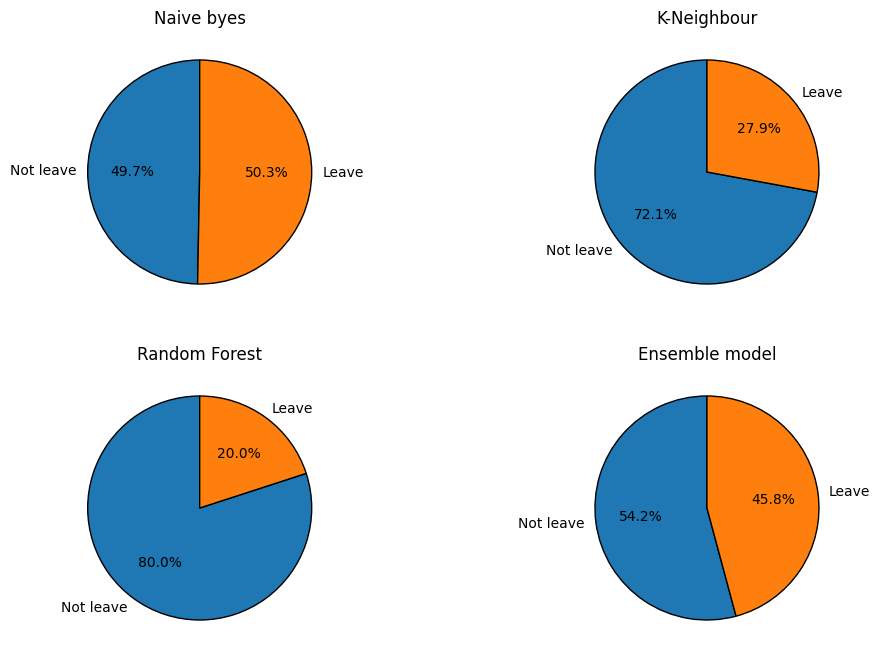

In [118]:
labels=["Not leave","Leave"]
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax[0][0].pie(prob_prediction['GNB'][0], labels=labels, autopct='%1.1f%%',wedgeprops={'edgecolor': 'black'}, startangle=90)
ax[0][0].set_title('Naive byes')
ax[0][1].pie(prob_prediction['RandFor'][0], labels=labels, autopct='%1.1f%%',wedgeprops={'edgecolor': 'black'}, startangle=90)
ax[0][1].set_title('K-Neighbour')
ax[1][0].pie(prob_prediction['knn'][0], labels=labels, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'},startangle=90)
ax[1][0].set_title('Random Forest')
ax[1][1].pie(prob_prediction['ensemble'][0], labels=labels, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'},startangle=90)
ax[1][1].set_title('Ensemble model')

# here we can see that the chances of customer would leave the company or not

In [119]:
prediction_probabilities = model2.predict(prediction)

probability_of_positive_class = prediction_probabilities[0][0]
probability_of_positive_class

1/1 [==============================] - 0s 76ms/step


0.073618904

In [120]:
res=[probability_of_positive_class*100,100-probability_of_positive_class*100]

In [121]:
mod_log.predict_proba(prediction)

array([[0.93733982, 0.06266018]])

In [122]:
print("By Ann Model :-","he will leave" if (model2.predict(prediction)).astype(int)==1 else "He will Not leave",f'{probability_of_positive_class*1000}')
print("By Logistic Model :-","he will leave" if (mod_log.predict(prediction)[0])==1 else "He will Not leave",max(mod_log.predict_proba(prediction)[0]*100))

1/1 [==============================] - 0s 41ms/step
By Ann Model :- He will Not leave 73.61890375614166
By Logistic Model :- He will Not leave 93.73398176172417


# This are Mega models For showing risk of churn of a customer

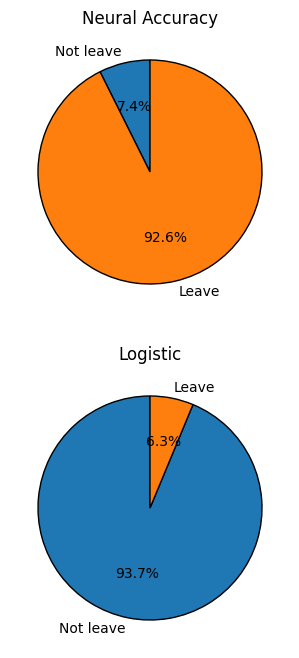

In [123]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].pie(res, labels=labels, autopct='%1.1f%%',wedgeprops={'edgecolor': 'black'}, startangle=90)
ax[0].set_title('Neural Accuracy')
ax[1].pie(mod_log.predict_proba(prediction)[0], labels=labels, autopct='%1.1f%%',wedgeprops={'edgecolor': 'black'}, startangle=90)
ax[1].set_title("Logistic")
fig.show()

In [124]:
from sklearn.pipeline import Pipeline

In [125]:
pipeline = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ("RandForest",forest),
    ("GNaiveB",nb_classifier2),
    ("KNeighbour",knn),
    ("Ensemble",ensemble_classifier),
    ("Logistic",mod_log)
])

In [126]:
import joblib


In [127]:
joblib.dump(pipeline,"Churn_pred.joblib")

['Churn_pred.joblib']

In [129]:
model2.save("my_model.h5")